C:\Users\dngud\AppData\Local\Temp\ipykernel_11924\1373635817.py:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


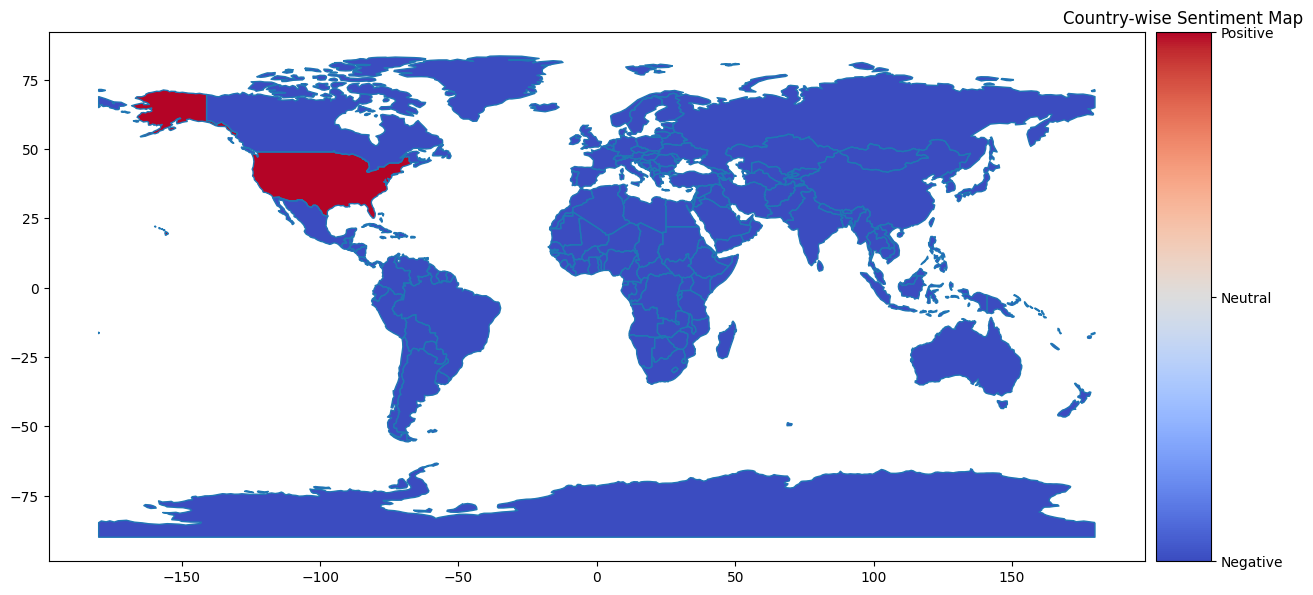

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# 샘플 트위터 데이터
twitter_data = {'country': ['USA', 'USA', 'UK', 'UK', 'KOR', 'USA', 'KOR'],
                'opinion': [-1, 1, 0, -1, 1, 1, -1]}

# 데이터프레임 생성
df = pd.DataFrame(twitter_data)

# 국가별 감정 합계 계산
sentiment_sum = df.groupby('country')['opinion'].sum().reset_index()
sentiment_sum.columns = ['country', 'sentiment_sum']

# 세계 지도 데이터 로드
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 국가별 감정 데이터를 세계 지도 데이터에 병합
merged = world.merge(sentiment_sum, left_on='iso_a3', right_on='country', how='left')

# 감정 합계에 따라 색상 범위를 정규화
merged['sentiment_sum'] = merged['sentiment_sum'].fillna(0)
vmin = merged['sentiment_sum'].min()
vmax = merged['sentiment_sum'].max()
merged['sentiment_sum_normalized'] = (merged['sentiment_sum'] - vmin) / (vmax - vmin)

# 세계지도에 국가별 감정 지도 그리기
fig, ax = plt.subplots(1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged.boundary.plot(ax=ax, linewidth=1)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])

# 컬러바에 레이블 추가
cbar = fig.colorbar(sm, cax=cax)
tick_values = np.linspace(vmin, vmax, num=3)
cbar.set_ticks(tick_values)
cbar.set_ticklabels(['Negative', 'Neutral', 'Positive'])

merged.plot(column='sentiment_sum_normalized', cmap='coolwarm', ax=ax, legend=False)

plt.title("Country-wise Sentiment Map")
plt.show()
